In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import tweepy
import configparser

In [2]:
api_key = ""
api_key_secret =""

access_token = ""
access_token_secret = ""

# authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [5]:
def fetch_data():

    # Tickers on what we search the tweets
    tickers = ['#bitcoin', '#gold','#Altcoin', '#Coindesk','#Cryptocurrency','#APPL','#GOOG','#YHOO']
    # Present the limit is set to 10 to save the computational time
    limit=10

    # Creating a datafram in wich the tweets extracted are stored
    df = pd.DataFrame(columns = ['Created At', 'User', 'Tweet', 'Location', 'Tickers'])
    data = []
    # Specifing the duration of time span in which the tweets are extracted
    date_list=["2022-07-01","2022-07-02","2022-07-03","2022-07-04","2022-07-05","2022-07-06","2022-07-07"]
    #Extracting the tweets
    for ticker in tickers:
        for date in date_list:
            
            tweets = tweepy.Cursor(api.search_tweets, q=ticker,until=date,lang="en", tweet_mode='extended').items(limit)
            # Defining the columns
            columns = ['Created At', 'User', 'Tweet', 'Location']

            for tweet in tweets:
                # Append all tweets for the ticker
                data.append([tweet.created_at, tweet.user.screen_name,tweet.full_text,tweet.user.location])
                print(tweet.created_at)
            print(data)
            ticker_df = pd.DataFrame(data, columns=columns) # All tweets for 1 ticker

            # Generate new column to classify tweets and ticker
            query_labels = pd.Series([ticker]).repeat(len(ticker_df))
            query_labels_df = query_labels.to_frame(name="Tickers").reset_index(drop=True)

            intermed_ticker_df = pd.concat([ticker_df, query_labels_df], axis=1)
            time.sleep(30)
            # Append to final df
            df = pd.concat([df, intermed_ticker_df], axis=0)
    return df

In [6]:
df = fetch_data()

2022-06-30 23:59:59+00:00
2022-06-30 23:59:59+00:00
2022-06-30 23:59:57+00:00
2022-06-30 23:59:56+00:00
2022-06-30 23:59:56+00:00
2022-06-30 23:59:56+00:00
2022-06-30 23:59:55+00:00
2022-06-30 23:59:55+00:00
2022-06-30 23:59:54+00:00
2022-06-30 23:59:54+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-03 23:59:58+00:00
2022-07-03 23:59:56+00:00
2022-07-03 23:59:54+00:00
2022-07-03 23:59:54+00:00
2022-07-03 23:59:53+00:00
2022-07-03 23:59:52+00:00
2022-07-03 23:59:50+00:00
2022-07-03 23:59:50+00:00
2022-07-03 23:59:48+00:00
2022-07-03 23:59:48+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-04 23:59:59+00:00
2022-07-04 23:59:59+00:00
2022-07-04 23:59:56+00:00
2022-07-04 23:59:55+00:00
2022-07-04 23:59:53+00:00
2022-07-04 23:59:52+00:00
2022-07-04 23:59:50+00:00
2022-07-04 23:59:49+00:00
2022-07-04 23:59:49+00:00
2022-07-04 23:59:47+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-05 23:59:59+00:00
2022-07-05 23:59:58+00:00
2022-07-05 23:59:57+00:00
2022-07-05 23:59:57+00:00
2022-07-05 23:59:56+00:00
2022-07-05 23:59:55+00:00
2022-07-05 23:59:54+00:00
2022-07-05 23:59:54+00:00
2022-07-05 23:59:51+00:00
2022-07-05 23:59:50+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-06 23:59:58+00:00
2022-07-06 23:59:57+00:00
2022-07-06 23:59:56+00:00
2022-07-06 23:59:55+00:00
2022-07-06 23:59:53+00:00
2022-07-06 23:59:52+00:00
2022-07-06 23:59:51+00:00
2022-07-06 23:59:50+00:00
2022-07-06 23:59:48+00:00
2022-07-06 23:59:46+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-06-30 23:59:44+00:00
2022-06-30 23:58:58+00:00
2022-06-30 23:58:18+00:00
2022-06-30 23:57:57+00:00
2022-06-30 23:57:36+00:00
2022-06-30 23:57:13+00:00
2022-06-30 23:56:12+00:00
2022-06-30 23:56:11+00:00
2022-06-30 23:55:36+00:00
2022-06-30 23:55:33+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-01 23:59:31+00:00
2022-07-01 23:59:06+00:00
2022-07-01 23:56:12+00:00
2022-07-01 23:55:58+00:00
2022-07-01 23:55:21+00:00
2022-07-01 23:54:18+00:00
2022-07-01 23:53:45+00:00
2022-07-01 23:51:30+00:00
2022-07-01 23:50:30+00:00
2022-07-01 23:49:32+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-02 23:59:20+00:00
2022-07-02 23:59:13+00:00
2022-07-02 23:58:58+00:00
2022-07-02 23:56:52+00:00
2022-07-02 23:56:04+00:00
2022-07-02 23:54:14+00:00
2022-07-02 23:53:48+00:00
2022-07-02 23:53:35+00:00
2022-07-02 23:53:01+00:00
2022-07-02 23:52:00+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-03 23:59:29+00:00
2022-07-03 23:58:56+00:00
2022-07-03 23:58:46+00:00
2022-07-03 23:58:30+00:00
2022-07-03 23:57:18+00:00
2022-07-03 23:56:03+00:00
2022-07-03 23:55:32+00:00
2022-07-03 23:55:25+00:00
2022-07-03 23:53:34+00:00
2022-07-03 23:53:23+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-04 23:59:54+00:00
2022-07-04 23:59:49+00:00
2022-07-04 23:59:38+00:00
2022-07-04 23:58:53+00:00
2022-07-04 23:57:02+00:00
2022-07-04 23:56:48+00:00
2022-07-04 23:56:28+00:00
2022-07-04 23:55:48+00:00
2022-07-04 23:55:11+00:00
2022-07-04 23:55:09+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-05 23:59:26+00:00
2022-07-05 23:59:25+00:00
2022-07-05 23:59:01+00:00
2022-07-05 23:58:54+00:00
2022-07-05 23:58:49+00:00
2022-07-05 23:58:47+00:00
2022-07-05 23:58:34+00:00
2022-07-05 23:58:33+00:00
2022-07-05 23:58:32+00:00
2022-07-05 23:56:45+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-06 23:59:57+00:00
2022-07-06 23:59:37+00:00
2022-07-06 23:59:34+00:00
2022-07-06 23:59:00+00:00
2022-07-06 23:58:04+00:00
2022-07-06 23:55:56+00:00
2022-07-06 23:55:44+00:00
2022-07-06 23:55:03+00:00
2022-07-06 23:54:05+00:00
2022-07-06 23:53:01+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-06-30 23:59:30+00:00
2022-06-30 23:58:13+00:00
2022-06-30 23:57:25+00:00
2022-06-30 23:57:10+00:00
2022-06-30 23:56:55+00:00
2022-06-30 23:56:29+00:00
2022-06-30 23:56:27+00:00
2022-06-30 23:55:45+00:00
2022-06-30 23:55:03+00:00
2022-06-30 23:54:48+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-01 23:59:57+00:00
2022-07-01 23:59:34+00:00
2022-07-01 23:57:29+00:00
2022-07-01 23:57:27+00:00
2022-07-01 23:57:25+00:00
2022-07-01 23:57:10+00:00
2022-07-01 23:56:57+00:00
2022-07-01 23:56:43+00:00
2022-07-01 23:56:25+00:00
2022-07-01 23:56:25+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-02 23:59:41+00:00
2022-07-02 23:59:10+00:00
2022-07-02 23:59:02+00:00
2022-07-02 23:58:58+00:00
2022-07-02 23:57:13+00:00
2022-07-02 23:57:04+00:00
2022-07-02 23:56:31+00:00
2022-07-02 23:56:00+00:00
2022-07-02 23:55:57+00:00
2022-07-02 23:55:47+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-03 23:59:59+00:00
2022-07-03 23:59:43+00:00
2022-07-03 23:59:42+00:00
2022-07-03 23:59:37+00:00
2022-07-03 23:59:31+00:00
2022-07-03 23:59:31+00:00
2022-07-03 23:59:24+00:00
2022-07-03 23:59:18+00:00
2022-07-03 23:59:08+00:00
2022-07-03 23:58:51+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-04 23:59:51+00:00
2022-07-04 23:59:38+00:00
2022-07-04 23:59:21+00:00
2022-07-04 23:59:16+00:00
2022-07-04 23:59:12+00:00
2022-07-04 23:58:59+00:00
2022-07-04 23:58:54+00:00
2022-07-04 23:57:54+00:00
2022-07-04 23:57:51+00:00
2022-07-04 23:57:18+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-05 23:59:57+00:00
2022-07-05 23:59:46+00:00
2022-07-05 23:56:32+00:00
2022-07-05 23:56:21+00:00
2022-07-05 23:56:11+00:00
2022-07-05 23:56:06+00:00
2022-07-05 23:54:55+00:00
2022-07-05 23:54:29+00:00
2022-07-05 23:54:15+00:00
2022-07-05 23:53:52+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-06 23:59:59+00:00
2022-07-06 23:59:37+00:00
2022-07-06 23:59:31+00:00
2022-07-06 23:59:03+00:00
2022-07-06 23:58:50+00:00
2022-07-06 23:58:24+00:00
2022-07-06 23:57:41+00:00
2022-07-06 23:55:15+00:00
2022-07-06 23:55:08+00:00
2022-07-06 23:53:28+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-06-30 22:00:02+00:00
2022-06-30 21:32:02+00:00
2022-06-30 21:22:25+00:00
2022-06-30 20:38:50+00:00
2022-06-30 20:16:16+00:00
2022-06-30 20:00:02+00:00
2022-06-30 19:45:30+00:00
2022-06-30 19:22:44+00:00
2022-06-30 18:32:37+00:00
2022-06-30 18:27:57+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-01 23:04:01+00:00
2022-07-01 22:00:03+00:00
2022-07-01 20:55:54+00:00
2022-07-01 20:14:16+00:00
2022-07-01 20:00:03+00:00
2022-07-01 18:43:03+00:00
2022-07-01 18:00:03+00:00
2022-07-01 17:42:22+00:00
2022-07-01 17:00:13+00:00
2022-07-01 16:31:21+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-02 23:07:45+00:00
2022-07-02 22:00:03+00:00
2022-07-02 20:09:04+00:00
2022-07-02 20:07:01+00:00
2022-07-02 20:00:03+00:00
2022-07-02 18:26:26+00:00
2022-07-02 18:00:03+00:00
2022-07-02 17:02:49+00:00
2022-07-02 16:00:02+00:00
2022-07-02 14:00:03+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-03 23:18:20+00:00
2022-07-03 22:00:03+00:00
2022-07-03 21:26:19+00:00
2022-07-03 21:14:02+00:00
2022-07-03 20:16:40+00:00
2022-07-03 20:00:03+00:00
2022-07-03 18:00:03+00:00
2022-07-03 16:56:24+00:00
2022-07-03 16:44:36+00:00
2022-07-03 16:22:31+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-04 22:42:40+00:00
2022-07-04 22:00:04+00:00
2022-07-04 20:05:25+00:00
2022-07-04 20:00:03+00:00
2022-07-04 19:00:24+00:00
2022-07-04 18:00:02+00:00
2022-07-04 16:39:02+00:00
2022-07-04 16:00:03+00:00
2022-07-04 15:00:03+00:00
2022-07-04 14:20:35+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-05 22:00:02+00:00
2022-07-05 20:00:02+00:00
2022-07-05 19:54:16+00:00
2022-07-05 18:00:06+00:00
2022-07-05 18:00:02+00:00
2022-07-05 17:36:37+00:00
2022-07-05 17:16:36+00:00
2022-07-05 17:15:20+00:00
2022-07-05 16:41:03+00:00
2022-07-05 16:06:53+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-06 22:00:02+00:00
2022-07-06 20:00:03+00:00
2022-07-06 18:00:03+00:00
2022-07-06 16:00:03+00:00
2022-07-06 14:00:02+00:00
2022-07-06 13:57:37+00:00
2022-07-06 13:57:04+00:00
2022-07-06 13:26:53+00:00
2022-07-06 12:00:03+00:00
2022-07-06 11:07:43+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-06-30 23:59:59+00:00
2022-06-30 23:59:55+00:00
2022-06-30 23:59:53+00:00
2022-06-30 23:59:52+00:00
2022-06-30 23:59:49+00:00
2022-06-30 23:59:44+00:00
2022-06-30 23:59:39+00:00
2022-06-30 23:59:33+00:00
2022-06-30 23:59:29+00:00
2022-06-30 23:59:19+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-01 23:59:57+00:00
2022-07-01 23:59:52+00:00
2022-07-01 23:59:45+00:00
2022-07-01 23:59:44+00:00
2022-07-01 23:59:43+00:00
2022-07-01 23:59:35+00:00
2022-07-01 23:59:34+00:00
2022-07-01 23:59:22+00:00
2022-07-01 23:59:20+00:00
2022-07-01 23:59:18+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-02 23:59:57+00:00
2022-07-02 23:59:52+00:00
2022-07-02 23:59:49+00:00
2022-07-02 23:59:49+00:00
2022-07-02 23:59:49+00:00
2022-07-02 23:59:48+00:00
2022-07-02 23:59:45+00:00
2022-07-02 23:59:42+00:00
2022-07-02 23:59:40+00:00
2022-07-02 23:59:40+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-03 23:59:58+00:00
2022-07-03 23:59:55+00:00
2022-07-03 23:59:55+00:00
2022-07-03 23:59:52+00:00
2022-07-03 23:59:51+00:00
2022-07-03 23:59:51+00:00
2022-07-03 23:59:49+00:00
2022-07-03 23:59:47+00:00
2022-07-03 23:59:47+00:00
2022-07-03 23:59:45+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-04 23:59:54+00:00
2022-07-04 23:59:54+00:00
2022-07-04 23:59:52+00:00
2022-07-04 23:59:51+00:00
2022-07-04 23:59:51+00:00
2022-07-04 23:59:47+00:00
2022-07-04 23:59:47+00:00
2022-07-04 23:59:46+00:00
2022-07-04 23:59:43+00:00
2022-07-04 23:59:41+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-05 23:59:58+00:00
2022-07-05 23:59:57+00:00
2022-07-05 23:59:53+00:00
2022-07-05 23:59:43+00:00
2022-07-05 23:59:40+00:00
2022-07-05 23:59:38+00:00
2022-07-05 23:59:23+00:00
2022-07-05 23:59:21+00:00
2022-07-05 23:59:17+00:00
2022-07-05 23:59:16+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-06 23:59:57+00:00
2022-07-06 23:59:56+00:00
2022-07-06 23:59:52+00:00
2022-07-06 23:59:45+00:00
2022-07-06 23:59:44+00:00
2022-07-06 23:59:44+00:00
2022-07-06 23:59:43+00:00
2022-07-06 23:59:37+00:00
2022-07-06 23:59:37+00:00
2022-07-06 23:59:34+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-06-30 21:21:25+00:00
2022-06-30 19:00:02+00:00
2022-06-30 17:00:03+00:00
2022-06-30 15:00:03+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022,

2022-07-01 23:27:30+00:00
2022-07-01 19:00:03+00:00
2022-07-01 17:00:02+00:00
2022-07-01 15:00:02+00:00
2022-07-01 12:35:43+00:00
2022-07-01 00:01:00+00:00
2022-06-30 21:21:25+00:00
2022-06-30 19:00:02+00:00
2022-06-30 17:00:03+00:00
2022-06-30 15:00:03+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-02 21:47:00+00:00
2022-07-01 23:27:30+00:00
2022-07-01 19:00:03+00:00
2022-07-01 17:00:02+00:00
2022-07-01 15:00:02+00:00
2022-07-01 12:35:43+00:00
2022-07-01 00:01:00+00:00
2022-06-30 21:21:25+00:00
2022-06-30 19:00:02+00:00
2022-06-30 17:00:03+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-03 19:18:03+00:00
2022-07-03 07:25:26+00:00
2022-07-03 02:46:20+00:00
2022-07-03 01:04:24+00:00
2022-07-02 21:47:00+00:00
2022-07-01 23:27:30+00:00
2022-07-01 19:00:03+00:00
2022-07-01 17:00:02+00:00
2022-07-01 15:00:02+00:00
2022-07-01 12:35:43+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-04 10:45:35+00:00
2022-07-04 10:11:09+00:00
2022-07-03 19:18:03+00:00
2022-07-03 07:25:26+00:00
2022-07-03 02:46:20+00:00
2022-07-03 01:04:24+00:00
2022-07-02 21:47:00+00:00
2022-07-01 23:27:30+00:00
2022-07-01 19:00:03+00:00
2022-07-01 17:00:02+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-05 22:55:19+00:00
2022-07-05 22:49:30+00:00
2022-07-05 21:30:17+00:00
2022-07-05 19:54:25+00:00
2022-07-05 19:07:26+00:00
2022-07-05 19:00:02+00:00
2022-07-05 06:49:33+00:00
2022-07-04 10:45:35+00:00
2022-07-04 10:11:09+00:00
2022-07-03 19:18:03+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-06 22:03:30+00:00
2022-07-06 20:47:41+00:00
2022-07-06 20:47:37+00:00
2022-07-06 06:35:19+00:00
2022-07-06 06:34:51+00:00
2022-07-06 06:07:27+00:00
2022-07-06 05:06:15+00:00
2022-07-06 05:06:14+00:00
2022-07-06 05:06:00+00:00
2022-07-06 05:01:38+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-06-30 22:17:23+00:00
2022-06-30 22:02:10+00:00
2022-06-30 21:59:46+00:00
2022-06-30 21:57:00+00:00
2022-06-30 20:57:19+00:00
2022-06-30 20:53:47+00:00
2022-06-30 20:23:46+00:00
2022-06-30 18:13:17+00:00
2022-06-30 15:35:42+00:00
2022-06-30 15:35:13+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-01 23:38:09+00:00
2022-07-01 22:53:47+00:00
2022-07-01 22:23:46+00:00
2022-07-01 21:57:11+00:00
2022-07-01 19:13:26+00:00
2022-07-01 17:31:41+00:00
2022-07-01 17:13:56+00:00
2022-07-01 16:57:52+00:00
2022-07-01 16:57:35+00:00
2022-07-01 16:57:21+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-02 23:57:42+00:00
2022-07-02 19:28:57+00:00
2022-07-02 14:56:25+00:00
2022-07-02 14:55:06+00:00
2022-07-02 14:39:09+00:00
2022-07-02 11:23:46+00:00
2022-07-02 05:23:46+00:00
2022-07-02 03:21:41+00:00
2022-07-02 03:19:37+00:00
2022-07-02 02:30:13+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-03 21:45:46+00:00
2022-07-03 19:53:46+00:00
2022-07-03 15:29:10+00:00
2022-07-03 13:51:28+00:00
2022-07-03 13:23:47+00:00
2022-07-03 07:23:46+00:00
2022-07-03 06:53:46+00:00
2022-07-03 02:30:13+00:00
2022-07-03 01:56:13+00:00
2022-07-03 00:24:01+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-04 23:47:26+00:00
2022-07-04 21:53:46+00:00
2022-07-04 15:23:46+00:00
2022-07-04 12:45:50+00:00
2022-07-04 09:59:16+00:00
2022-07-04 03:50:20+00:00
2022-07-04 02:30:14+00:00
2022-07-03 21:45:46+00:00
2022-07-03 19:53:46+00:00
2022-07-03 15:29:10+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-05 23:53:51+00:00
2022-07-05 23:53:46+00:00
2022-07-05 19:00:12+00:00
2022-07-05 19:00:02+00:00
2022-07-05 17:53:47+00:00
2022-07-05 17:23:47+00:00
2022-07-05 15:51:08+00:00
2022-07-05 15:23:05+00:00
2022-07-05 15:07:35+00:00
2022-07-05 13:33:49+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

2022-07-06 20:55:54+00:00
2022-07-06 19:53:46+00:00
2022-07-06 19:23:47+00:00
2022-07-06 18:33:23+00:00
2022-07-06 13:49:07+00:00
2022-07-06 13:23:47+00:00
2022-07-06 12:53:46+00:00
2022-07-06 09:29:54+00:00
2022-07-06 06:23:46+00:00
2022-07-06 02:30:14+00:00
[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc

[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc), 'AndersTintin', 'RT @OfficialTravlad: What tf is this

[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc), 'AndersTintin', 'RT @OfficialTravlad: What tf is this

[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc), 'AndersTintin', 'RT @OfficialTravlad: What tf is this

[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc), 'AndersTintin', 'RT @OfficialTravlad: What tf is this

[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc), 'AndersTintin', 'RT @OfficialTravlad: What tf is this

[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc), 'AndersTintin', 'RT @OfficialTravlad: What tf is this

[[datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'EngieFord', "RT @IncomeSharks: From July 1st to November 1st I'll be buying $1,000 worth of #Bitcoin everyday and tracking the results. Pretty confident…", ''], [datetime.datetime(2022, 6, 30, 23, 59, 59, tzinfo=datetime.timezone.utc), 'DeepStar22', 'RT @OfficialTravlad: What tf is this #Bitcoin candle, looks so manipulated…', 'New Delhi, India'], [datetime.datetime(2022, 6, 30, 23, 59, 57, tzinfo=datetime.timezone.utc), 'nerivansouza01', 'RT @milkshake_io: MicroStrategy chief executive Michael Saylor announced an additional purchase of 480 #bitcoins  (#BTC) for roughly US$10…', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc), 'EngieFord', 'RT @CedYoungelman: Your home is not worth more. \n\nYour money is just worth less. \n\n#Bitcoin fixes this.', ''], [datetime.datetime(2022, 6, 30, 23, 59, 56, tzinfo=datetime.timezone.utc), 'AndersTintin', 'RT @OfficialTravlad: What tf is this

In [7]:
df

Created At            User  \
0    2022-06-30 23:59:59+00:00       EngieFord   
1    2022-06-30 23:59:59+00:00      DeepStar22   
2    2022-06-30 23:59:57+00:00  nerivansouza01   
3    2022-06-30 23:59:56+00:00       EngieFord   
4    2022-06-30 23:59:56+00:00    AndersTintin   
..                         ...             ...   
479  2022-07-06 13:23:47+00:00  leoventuresllc   
480  2022-07-06 12:53:46+00:00  leoventuresllc   
481  2022-07-06 09:29:54+00:00          iob_fi   
482  2022-07-06 06:23:46+00:00  leoventuresllc   
483  2022-07-06 02:30:14+00:00         IOB_llc   

                                                 Tweet             Location  \
0    RT @IncomeSharks: From July 1st to November 1s...                        
1    RT @OfficialTravlad: What tf is this #Bitcoin ...     New Delhi, India   
2    RT @milkshake_io: MicroStrategy chief executiv...                        
3    RT @CedYoungelman: Your home is not worth more...                        
4    RT @OfficialTravlad: What tf is this #Bitcoin ...  New Norway, Alberta   
..                                                 ...                  ...   
479  Google is the internet !! #google #googl #goog...          Chicago, IL   
480  Google...What Can I Say !! #google #googl #sto...          Chicago, IL   
481  RT @IOB_llc: #Google #GOOG #TechnicalIndicator...               global   
482  Google...What Can I Say !! #google #googl #sto...          Chicago, IL   
483  #Google #GOOG #TechnicalIndicator Market Types...             Shanghai   

      Tickers  
0    #bitcoin  
1    #bitcoin  
2    #bitcoin  
3    #bitcoin  
4    #bitcoin  
..        ...  
479     #YHOO  
480     #YHOO  
481     #YHOO  
482     #YHOO  
483     #YHOO  

[15554 rows x 5 columns]

In [8]:
df['Created_Date'] = pd.to_datetime(df['Created At']).dt.date

In [9]:
df.Created_Date.unique()

array([datetime.date(2022, 6, 30), datetime.date(2022, 7, 1),
       datetime.date(2022, 7, 2), datetime.date(2022, 7, 3),
       datetime.date(2022, 7, 4), datetime.date(2022, 7, 5),
       datetime.date(2022, 7, 6)], dtype=object)

In [10]:
df.to_csv('stock_tweets.csv')

In [11]:
df2=df.copy(deep=True)

In [12]:
df2.shape

(15554, 6)

In [13]:
df3=df.drop_duplicates(subset=None, keep='first')

In [14]:
df3.shape

(2310, 6)

In [15]:
# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub(r'\W*\b\w{1,2}\b', '', text) # Removing wordls less than length of 2
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text
df3["Tweet"] = df3["Tweet"].apply(cleanTxt)
df3

C:\Users\user\AppData\Local\Temp\ipykernel_20668\2088870729.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Tweet"] = df3["Tweet"].apply(cleanTxt)


Created At            User  \
0    2022-06-30 23:59:59+00:00       EngieFord   
1    2022-06-30 23:59:59+00:00      DeepStar22   
2    2022-06-30 23:59:57+00:00  nerivansouza01   
3    2022-06-30 23:59:56+00:00       EngieFord   
4    2022-06-30 23:59:56+00:00    AndersTintin   
..                         ...             ...   
479  2022-07-06 13:23:47+00:00  leoventuresllc   
480  2022-07-06 12:53:46+00:00  leoventuresllc   
481  2022-07-06 09:29:54+00:00          iob_fi   
482  2022-07-06 06:23:46+00:00  leoventuresllc   
483  2022-07-06 02:30:14+00:00         IOB_llc   

                                                 Tweet             Location  \
0     : From July 1st November 1st buying,000 worth...                        
1       : What this Bitcoin candle, looks manipulated…     New Delhi, India   
2     _io: MicroStrategy chief executive Michael Sa...                        
3     : Your home not worth more. \n\nYour money ju...                        
4       : What this Bitcoin candle, looks manipulated…  New Norway, Alberta   
..                                                 ...                  ...   
479  Google the internet !! google googl goog stock...          Chicago, IL   
480  Google...What Can Say !! google googl stock te...          Chicago, IL   
481   _llc: Google GOOG TechnicalIndicator Market T...               global   
482  Google...What Can Say !! google googl stock te...          Chicago, IL   
483  Google GOOG TechnicalIndicator Market Types.03...             Shanghai   

      Tickers Created_Date  
0    #bitcoin   2022-06-30  
1    #bitcoin   2022-06-30  
2    #bitcoin   2022-06-30  
3    #bitcoin   2022-06-30  
4    #bitcoin   2022-06-30  
..        ...          ...  
479     #YHOO   2022-07-06  
480     #YHOO   2022-07-06  
481     #YHOO   2022-07-06  
482     #YHOO   2022-07-06  
483     #YHOO   2022-07-06  

[2310 rows x 6 columns]

In [16]:
tickers = ['#bitcoin', '#gold','#Altcoin', '#Coindesk','#Cryptocurrency','#APPL','#GOOG','#YHOO']
df3['Created At'] = pd.to_datetime(df3['Created At'])

start_date='2022-07-01'

end_date='2022-07-07'

tweets_in_past_day = []

for ticker in tickers:

    mask = (df3['Created At'] > start_date) & (df3['Created At'] <= end_date) & (df3['Tickers'] == ticker)    
    num_tweets = len(df3.loc[mask])
    tweets_in_past_day.append(num_tweets)

C:\Users\user\AppData\Local\Temp\ipykernel_20668\2577241891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Created At'] = pd.to_datetime(df3['Created At'])


In [17]:
tweets_in_past_day

[60, 120, 180, 240, 295, 325, 381, 381]

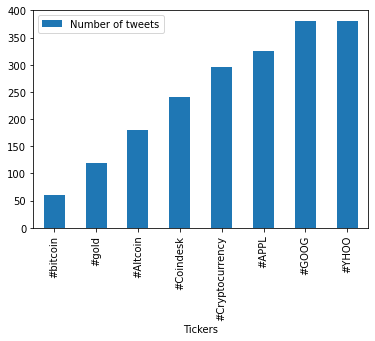

In [18]:
visualization1 = pd.DataFrame({'Tickers':tickers, 'Number of tweets':tweets_in_past_day})
ax = visualization1.plot.bar(x='Tickers', y='Number of tweets')

In [19]:
start_date='2022-07-01'

end_date='2022-07-07'

distinct_users_in_past_day = []

for ticker in tickers:
    mask = (df3['Created At'] > start_date) & (df3['Created At'] <= end_date) & (df3['Tickers'] == ticker)    
    num_users = df3.loc[mask]
    n = len(pd.unique(num_users['User']))
    distinct_users_in_past_day.append(n)

Number of tweets for tickers in the 7 days (July 1, 2022 - July 7, 2022)

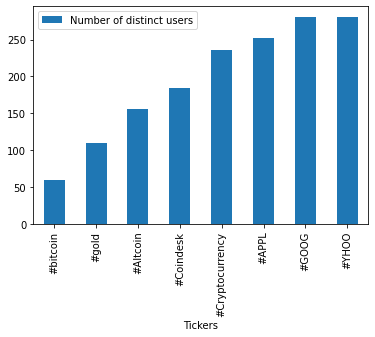

In [20]:
visualization2 = pd.DataFrame({'Tickers':tickers, 'Number of distinct users':distinct_users_in_past_day})
ax = visualization2.plot.bar(x='Tickers', y='Number of distinct users', rot=90)

In [21]:
df3.to_csv('stock.csv') 

In [22]:
df3=df2.drop_duplicates(subset=None, keep='first')

In [23]:
df3.Tickers.unique()

array(['#bitcoin', '#gold', '#Altcoin', '#Coindesk', '#Cryptocurrency',
       '#APPL', '#GOOG', '#YHOO'], dtype=object)

In [24]:
bitcoin=df3[df3['Tickers']=="#bitcoin"]

In [25]:
bitcoin

Created At            User  \
0   2022-06-30 23:59:59+00:00       EngieFord   
1   2022-06-30 23:59:59+00:00      DeepStar22   
2   2022-06-30 23:59:57+00:00  nerivansouza01   
3   2022-06-30 23:59:56+00:00       EngieFord   
4   2022-06-30 23:59:56+00:00    AndersTintin   
..                        ...             ...   
65  2022-07-06 23:59:52+00:00        Azcrypt0   
66  2022-07-06 23:59:51+00:00          HMitke   
67  2022-07-06 23:59:50+00:00        stillbtc   
68  2022-07-06 23:59:48+00:00    hann_marie22   
69  2022-07-06 23:59:46+00:00     daleperozzo   

                                                Tweet             Location  \
0   RT @IncomeSharks: From July 1st to November 1s...                        
1   RT @OfficialTravlad: What tf is this #Bitcoin ...     New Delhi, India   
2   RT @milkshake_io: MicroStrategy chief executiv...                        
3   RT @CedYoungelman: Your home is not worth more...                        
4   RT @OfficialTravlad: What tf is this #Bitcoin ...  New Norway, Alberta   
..                                                ...                  ...   
65  RT @Pouching973: @ScareCROcoin  🟢6% …probably ...                  Mtl   
66  RT @saylor: “Bitcoin is a monetary instrument ...                        
67  RT @aiproenergy: Immersion fluid is more effic...       Thinking Green   
68  RT @MartiniGuyYT: If #Bitcoin doesn’t hit $26,...           507 proofs   
69  RT @TheCryptoLark: How Investing In Crypto Act...                Earth   

     Tickers Created_Date  
0   #bitcoin   2022-06-30  
1   #bitcoin   2022-06-30  
2   #bitcoin   2022-06-30  
3   #bitcoin   2022-06-30  
4   #bitcoin   2022-06-30  
..       ...          ...  
65  #bitcoin   2022-07-06  
66  #bitcoin   2022-07-06  
67  #bitcoin   2022-07-06  
68  #bitcoin   2022-07-06  
69  #bitcoin   2022-07-06  

[70 rows x 6 columns]

In [32]:
bitcoin=df3[df3['Tickers']=="#bitcoin"]
bitcoin.to_csv('bitcoin.csv') 

In [34]:
gold=df3[df3['Tickers']=="#gold"]
gold
#gold.to_csv('gold.csv') 

Created At             User  \
0    2022-06-30 23:59:59+00:00        EngieFord   
1    2022-06-30 23:59:59+00:00       DeepStar22   
2    2022-06-30 23:59:57+00:00   nerivansouza01   
3    2022-06-30 23:59:56+00:00        EngieFord   
4    2022-06-30 23:59:56+00:00     AndersTintin   
..                         ...              ...   
135  2022-07-06 23:55:56+00:00   wojtekcrypto08   
136  2022-07-06 23:55:44+00:00  muzzleloaderman   
137  2022-07-06 23:55:03+00:00      TalkMarkets   
138  2022-07-06 23:54:05+00:00    BHC_Valentine   
139  2022-07-06 23:53:01+00:00  SalvadorMaurice   

                                                 Tweet             Location  \
0    RT @IncomeSharks: From July 1st to November 1s...                        
1    RT @OfficialTravlad: What tf is this #Bitcoin ...     New Delhi, India   
2    RT @milkshake_io: MicroStrategy chief executiv...                        
3    RT @CedYoungelman: Your home is not worth more...                        
4    RT @OfficialTravlad: What tf is this #Bitcoin ...  New Norway, Alberta   
..                                                 ...                  ...   
135  #Gold: Barrick Gold Corp (GOLD) closed today a...                        
136  RT @roxiewin7: Excited to share this item from...          Oregon, USA   
137  Rare #Gold-#Silver Crystal Sighting $GLD $SLV ...                        
138  #Hopping into some #hydroneer #earlyaccess #Ga...                        
139  $STK \n\nMULTIPLE NEW #GOLD ZONES AND HIGH-GRA...      Bali Indonesia    

    Tickers Created_Date  
0     #gold   2022-06-30  
1     #gold   2022-06-30  
2     #gold   2022-06-30  
3     #gold   2022-06-30  
4     #gold   2022-06-30  
..      ...          ...  
135   #gold   2022-07-06  
136   #gold   2022-07-06  
137   #gold   2022-07-06  
138   #gold   2022-07-06  
139   #gold   2022-07-06  

[140 rows x 6 columns]

In [35]:
Altcoin=df3[df3['Tickers']=="#Altcoin"]
Altcoin.to_csv('Altcoin.csv') 
Altcoin

Created At             User  \
0    2022-06-30 23:59:59+00:00        EngieFord   
1    2022-06-30 23:59:59+00:00       DeepStar22   
2    2022-06-30 23:59:57+00:00   nerivansouza01   
3    2022-06-30 23:59:56+00:00        EngieFord   
4    2022-06-30 23:59:56+00:00     AndersTintin   
..                         ...              ...   
205  2022-07-06 23:58:24+00:00  Rosemar97946025   
206  2022-07-06 23:57:41+00:00  Cryptoinsight14   
207  2022-07-06 23:55:15+00:00           RyiPay   
208  2022-07-06 23:55:08+00:00     ErsoganRecep   
209  2022-07-06 23:53:28+00:00         H2bRojas   

                                                 Tweet  \
0    RT @IncomeSharks: From July 1st to November 1s...   
1    RT @OfficialTravlad: What tf is this #Bitcoin ...   
2    RT @milkshake_io: MicroStrategy chief executiv...   
3    RT @CedYoungelman: Your home is not worth more...   
4    RT @OfficialTravlad: What tf is this #Bitcoin ...   
..                                                 ...   
205  RT @metaboxmarket: May will be bullish? \nTell...   
206  @cryptojack The only #altcoin I would buy from...   
207  RT @RyiPay: The #Cryptocurrency of Choice for ...   
208  RT @ENQ_enecuum: We remind you that the Enecuu...   
209  RT @AAdsabdo: @MrBigWhaleREAL #Saitama is the ...   

                         Location   Tickers Created_Date  
0                                  #Altcoin   2022-06-30  
1                New Delhi, India  #Altcoin   2022-06-30  
2                                  #Altcoin   2022-06-30  
3                                  #Altcoin   2022-06-30  
4             New Norway, Alberta  #Altcoin   2022-06-30  
..                            ...       ...          ...  
205                                #Altcoin   2022-07-06  
206                                #Altcoin   2022-07-06  
207  Los Angeles, California, USA  #Altcoin   2022-07-06  
208                                #Altcoin   2022-07-06  
209                                #Altcoin   2022-07-06  

[210 rows x 6 columns]

In [36]:
Coindesk=df3[df3['Tickers']=="#Coindesk"]
Coindesk.to_csv('Coindesk.csv') 
Coindesk

Created At            User  \
0    2022-06-30 23:59:59+00:00       EngieFord   
1    2022-06-30 23:59:59+00:00      DeepStar22   
2    2022-06-30 23:59:57+00:00  nerivansouza01   
3    2022-06-30 23:59:56+00:00       EngieFord   
4    2022-06-30 23:59:56+00:00    AndersTintin   
..                         ...             ...   
275  2022-07-06 13:57:37+00:00     codedtrader   
276  2022-07-06 13:57:04+00:00        QvrseDAO   
277  2022-07-06 13:26:53+00:00  The_Cryptostan   
278  2022-07-06 12:00:03+00:00       BTCticker   
279  2022-07-06 11:07:43+00:00     CryptoServu   

                                                 Tweet              Location  \
0    RT @IncomeSharks: From July 1st to November 1s...                         
1    RT @OfficialTravlad: What tf is this #Bitcoin ...      New Delhi, India   
2    RT @milkshake_io: MicroStrategy chief executiv...                         
3    RT @CedYoungelman: Your home is not worth more...                         
4    RT @OfficialTravlad: What tf is this #Bitcoin ...   New Norway, Alberta   
..                                                 ...                   ...   
275  BTC/USDT 4H symmetrical triangle. A breakout i...                         
276  We recommend this article about #DAO #Web3 #La...  Republic of Slovenia   
277  Tuesday saw the return of Brazilian real depos...                         
278  One Bitcoin now worth $20086.836. Market Cap $...                         
279  Bitcoin Recovers Above $20K as Small ETF Sees ...                         

       Tickers Created_Date  
0    #Coindesk   2022-06-30  
1    #Coindesk   2022-06-30  
2    #Coindesk   2022-06-30  
3    #Coindesk   2022-06-30  
4    #Coindesk   2022-06-30  
..         ...          ...  
275  #Coindesk   2022-07-06  
276  #Coindesk   2022-07-06  
277  #Coindesk   2022-07-06  
278  #Coindesk   2022-07-06  
279  #Coindesk   2022-07-06  

[280 rows x 6 columns]

In [37]:
Cryptocurrency=df3[df3['Tickers']=="#Cryptocurrency"]
Cryptocurrency.to_csv('Cryptocurrency.csv') 
Cryptocurrency

Created At             User  \
0    2022-06-30 23:59:59+00:00        EngieFord   
1    2022-06-30 23:59:59+00:00       DeepStar22   
2    2022-06-30 23:59:57+00:00   nerivansouza01   
3    2022-06-30 23:59:56+00:00        EngieFord   
4    2022-06-30 23:59:56+00:00     AndersTintin   
..                         ...              ...   
345  2022-07-06 23:59:44+00:00    Fatih66864011   
346  2022-07-06 23:59:43+00:00  WARWOLF62189157   
347  2022-07-06 23:59:37+00:00   nourimounir409   
348  2022-07-06 23:59:37+00:00     KenanGlolu16   
349  2022-07-06 23:59:34+00:00   pastibigwinkok   

                                                 Tweet             Location  \
0    RT @IncomeSharks: From July 1st to November 1s...                        
1    RT @OfficialTravlad: What tf is this #Bitcoin ...     New Delhi, India   
2    RT @milkshake_io: MicroStrategy chief executiv...                        
3    RT @CedYoungelman: Your home is not worth more...                        
4    RT @OfficialTravlad: What tf is this #Bitcoin ...  New Norway, Alberta   
..                                                 ...                  ...   
345  RT @metablackmoon: 10.000$ BUSD GIVEAWAY 🌘🚨\n\...                        
346  RT @ta64945087: #Saitama development team abou...                        
347  RT @PlayWizardia: All this talk of listings, g...                        
348  RT @coinlivetoday: 🚀🚀🚀 ‼️ Breaking News ‼️ Mas...                        
349  RT @GoCryptoMeCoin: We did it https://t.co/j6A...              where?    

             Tickers Created_Date  
0    #Cryptocurrency   2022-06-30  
1    #Cryptocurrency   2022-06-30  
2    #Cryptocurrency   2022-06-30  
3    #Cryptocurrency   2022-06-30  
4    #Cryptocurrency   2022-06-30  
..               ...          ...  
345  #Cryptocurrency   2022-07-06  
346  #Cryptocurrency   2022-07-06  
347  #Cryptocurrency   2022-07-06  
348  #Cryptocurrency   2022-07-06  
349  #Cryptocurrency   2022-07-06  

[344 rows x 6 columns]

In [38]:
APPL=df3[df3['Tickers']=="#APPL"]
APPL.to_csv('APPL.csv') 
APPL

Created At            User  \
0    2022-06-30 23:59:59+00:00       EngieFord   
1    2022-06-30 23:59:59+00:00      DeepStar22   
2    2022-06-30 23:59:57+00:00  nerivansouza01   
3    2022-06-30 23:59:56+00:00       EngieFord   
4    2022-06-30 23:59:56+00:00    AndersTintin   
..                         ...             ...   
409  2022-07-06 06:07:27+00:00     im_ba1tazar   
410  2022-07-06 05:06:15+00:00      PyScaleLLC   
411  2022-07-06 05:06:14+00:00      PyScaleLLC   
412  2022-07-06 05:06:00+00:00      PyScaleLLC   
413  2022-07-06 05:01:38+00:00     im_ba1tazar   

                                                 Tweet             Location  \
0    RT @IncomeSharks: From July 1st to November 1s...                        
1    RT @OfficialTravlad: What tf is this #Bitcoin ...     New Delhi, India   
2    RT @milkshake_io: MicroStrategy chief executiv...                        
3    RT @CedYoungelman: Your home is not worth more...                        
4    RT @OfficialTravlad: What tf is this #Bitcoin ...  New Norway, Alberta   
..                                                 ...                  ...   
409  @gandalfcryptto Love ❤️ #AITX #ai #APPL #MSFT ...                        
410  RT @im_ba1tazar: @BabyCatCoin @cz_binance Love...            Miami, FL   
411  RT @im_ba1tazar: Love ❤️ #AITX #ai #APPL #MSFT...            Miami, FL   
412  RT @im_ba1tazar: @jesmotril @CheemsInu Same! L...            Miami, FL   
413  @jesmotril @CheemsInu Same! Love ❤️ #AITX #ai ...                        

    Tickers Created_Date  
0     #APPL   2022-06-30  
1     #APPL   2022-06-30  
2     #APPL   2022-06-30  
3     #APPL   2022-06-30  
4     #APPL   2022-06-30  
..      ...          ...  
409   #APPL   2022-07-06  
410   #APPL   2022-07-06  
411   #APPL   2022-07-06  
412   #APPL   2022-07-06  
413   #APPL   2022-07-06  

[378 rows x 6 columns]

In [39]:
GOOG=df3[df3['Tickers']=="#GOOG"]
GOOG.to_csv('GOOG.csv')
GOOG

Created At            User  \
0    2022-06-30 23:59:59+00:00       EngieFord   
1    2022-06-30 23:59:59+00:00      DeepStar22   
2    2022-06-30 23:59:57+00:00  nerivansouza01   
3    2022-06-30 23:59:56+00:00       EngieFord   
4    2022-06-30 23:59:56+00:00    AndersTintin   
..                         ...             ...   
479  2022-07-06 13:23:47+00:00  leoventuresllc   
480  2022-07-06 12:53:46+00:00  leoventuresllc   
481  2022-07-06 09:29:54+00:00          iob_fi   
482  2022-07-06 06:23:46+00:00  leoventuresllc   
483  2022-07-06 02:30:14+00:00         IOB_llc   

                                                 Tweet             Location  \
0    RT @IncomeSharks: From July 1st to November 1s...                        
1    RT @OfficialTravlad: What tf is this #Bitcoin ...     New Delhi, India   
2    RT @milkshake_io: MicroStrategy chief executiv...                        
3    RT @CedYoungelman: Your home is not worth more...                        
4    RT @OfficialTravlad: What tf is this #Bitcoin ...  New Norway, Alberta   
..                                                 ...                  ...   
479  Google is the internet !! #google #googl #goog...          Chicago, IL   
480  Google...What Can I Say !! #google #googl #sto...          Chicago, IL   
481  RT @IOB_llc: #Google #GOOG #TechnicalIndicator...               global   
482  Google...What Can I Say !! #google #googl #sto...          Chicago, IL   
483  #Google #GOOG #TechnicalIndicator Market Types...             Shanghai   

    Tickers Created_Date  
0     #GOOG   2022-06-30  
1     #GOOG   2022-06-30  
2     #GOOG   2022-06-30  
3     #GOOG   2022-06-30  
4     #GOOG   2022-06-30  
..      ...          ...  
479   #GOOG   2022-07-06  
480   #GOOG   2022-07-06  
481   #GOOG   2022-07-06  
482   #GOOG   2022-07-06  
483   #GOOG   2022-07-06  

[444 rows x 6 columns]

In [40]:
YHOO=df3[df3['Tickers']=="#YHOO"]
YHOO.to_csv('YHOO.csv')
YHOO

Created At            User  \
0    2022-06-30 23:59:59+00:00       EngieFord   
1    2022-06-30 23:59:59+00:00      DeepStar22   
2    2022-06-30 23:59:57+00:00  nerivansouza01   
3    2022-06-30 23:59:56+00:00       EngieFord   
4    2022-06-30 23:59:56+00:00    AndersTintin   
..                         ...             ...   
479  2022-07-06 13:23:47+00:00  leoventuresllc   
480  2022-07-06 12:53:46+00:00  leoventuresllc   
481  2022-07-06 09:29:54+00:00          iob_fi   
482  2022-07-06 06:23:46+00:00  leoventuresllc   
483  2022-07-06 02:30:14+00:00         IOB_llc   

                                                 Tweet             Location  \
0    RT @IncomeSharks: From July 1st to November 1s...                        
1    RT @OfficialTravlad: What tf is this #Bitcoin ...     New Delhi, India   
2    RT @milkshake_io: MicroStrategy chief executiv...                        
3    RT @CedYoungelman: Your home is not worth more...                        
4    RT @OfficialTravlad: What tf is this #Bitcoin ...  New Norway, Alberta   
..                                                 ...                  ...   
479  Google is the internet !! #google #googl #goog...          Chicago, IL   
480  Google...What Can I Say !! #google #googl #sto...          Chicago, IL   
481  RT @IOB_llc: #Google #GOOG #TechnicalIndicator...               global   
482  Google...What Can I Say !! #google #googl #sto...          Chicago, IL   
483  #Google #GOOG #TechnicalIndicator Market Types...             Shanghai   

    Tickers Created_Date  
0     #YHOO   2022-06-30  
1     #YHOO   2022-06-30  
2     #YHOO   2022-06-30  
3     #YHOO   2022-06-30  
4     #YHOO   2022-06-30  
..      ...          ...  
479   #YHOO   2022-07-06  
480   #YHOO   2022-07-06  
481   #YHOO   2022-07-06  
482   #YHOO   2022-07-06  
483   #YHOO   2022-07-06  

[444 rows x 6 columns]